In [19]:
# Importing the required libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords= set(stopwords.words('english'))
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bakshish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bakshish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bakshish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# Reading the data

df = pd.read_csv('vegan_years.csv')

In [21]:
# First five rows of dataframe

df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Location
0,0,2022-07-19 23:58:23+00:00,1549544209450905600,Soup proof. The wife says it’s too much black ...,TechdommeWifey,"Coordinates(longitude=-118.668404, latitude=33..."
1,1,2022-07-19 23:56:31+00:00,1549543739642765314,Nursing moms will appreciate this! Soothe pain...,crazyoilladies,NaN
2,2,2022-07-19 23:55:52+00:00,1549543576953950209,Veganism should now be accepted as either a re...,chillangelino,NaN
3,3,2022-07-19 23:55:23+00:00,1549543455218606080,Our signature White Musk® is the scent of a ge...,DelightsInspire,NaN
4,4,2022-07-19 23:53:32+00:00,1549542989160009729,The most powerful Republican congressman from ...,TheGayVegans,NaN


In [22]:
# Gathering information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68136 entries, 0 to 68135
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  68136 non-null  int64 
 1   Datetime    68136 non-null  object
 2   Tweet Id    68136 non-null  int64 
 3   Text        68136 non-null  object
 4   Username    68136 non-null  object
 5   Location    3385 non-null   object
dtypes: int64(2), object(4)
memory usage: 3.1+ MB


In [23]:
#Displaying the first five rows
for i in range(5):
    print("Tweet: ", [i])
    print(df['Text'].iloc[i],"\n")

Tweet:  [0]
Soup proof. The wife says it’s too much black pepper, but good. 🍲 #vegan #soup #Tradwife https://t.co/HSSrTFDQqX 

Tweet:  [1]
Nursing moms will appreciate this! Soothe pain and discomfort, naturally.  #Vegan #natural #breastfeeding  https://t.co/QS9ljpt0Xu 

Tweet:  [2]
Veganism should now be accepted as either a religious, spiritual, or moral dietary option. Not some shambolic, bizarre dietary aberration.

#veganism #veganforlife #vegan #enviromentalism 

Tweet:  [3]
Our signature White Musk® is the scent of a generation. Freshen it up with our range of #vegan Fragrance Toppers and customise your signature scent. 💖
https://t.co/pcih6Gemaq

#TBSAH #TheBodyShop #Fragrance https://t.co/JG6nMeie8g 

Tweet:  [4]
The most powerful Republican congressman from California voted against marriage equality today. 

I’m not ignorant. I know bigotry exists. Everywhere. 

Let’s vote out the bigots like Kevin McCarthy. 

#gay #vegan #blogger #vote #resist #Resistance 



In [24]:
# In order to get the word count, a function is defined 
def WordCount(text):
    text= text.split()
    count= len(text)
    return count

In [25]:
#The word count of the tweets
df["word_count"]= df['Text'].apply(WordCount) 
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Location,word_count
0,0,2022-07-19 23:58:23+00:00,1549544209450905600,Soup proof. The wife says it’s too much black ...,TechdommeWifey,"Coordinates(longitude=-118.668404, latitude=33...",17
1,1,2022-07-19 23:56:31+00:00,1549543739642765314,Nursing moms will appreciate this! Soothe pain...,crazyoilladies,NaN,14
2,2,2022-07-19 23:55:52+00:00,1549543576953950209,Veganism should now be accepted as either a re...,chillangelino,NaN,24
3,3,2022-07-19 23:55:23+00:00,1549543455218606080,Our signature White Musk® is the scent of a ge...,DelightsInspire,NaN,31
4,4,2022-07-19 23:53:32+00:00,1549542989160009729,The most powerful Republican congressman from ...,TheGayVegans,NaN,34


In [26]:
#Cleaning the data from mentions, punctuations, urls and tokenising the text to remove stopwords
def CleanText(text):
    text= text.lower()
    text= re.sub('<br />','', text)
    text= re.sub('&amp|amp','', text)
    text= re.sub(r'https\S+|www\S+|http\S+','',text, flags= re.MULTILINE)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filter_text= [w for w in text_tokens if not w in stopwords]
    return(" ".join(filter_text))

#Cleaning the texts in the tweets
df.Text = df['Text'].apply(CleanText)

#First five rows of clean data
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Location,word_count
0,0,2022-07-19 23:58:23+00:00,1549544209450905600,soup proof wife says much black pepper good ve...,TechdommeWifey,"Coordinates(longitude=-118.668404, latitude=33...",17
1,1,2022-07-19 23:56:31+00:00,1549543739642765314,nursing moms appreciate soothe pain discomfort...,crazyoilladies,NaN,14
2,2,2022-07-19 23:55:52+00:00,1549543576953950209,veganism accepted either religious spiritual m...,chillangelino,NaN,24
3,3,2022-07-19 23:55:23+00:00,1549543455218606080,signature white musk scent generation freshen ...,DelightsInspire,NaN,31
4,4,2022-07-19 23:53:32+00:00,1549542989160009729,powerful republican congressman california vot...,TheGayVegans,NaN,34
...,...,...,...,...,...,...,...
68131,17377,2019-01-01 10:53:33+00:00,1080054413161582592,12 new years wish plant meetings set sessions ...,CG_ath,NaN,39
68132,17378,2019-01-01 07:02:07+00:00,1079996174269104128,best plantbased foods high protein vegan nutri...,Seattle_Diners,NaN,10
68133,17379,2019-01-01 07:01:20+00:00,1079995976050507777,best plantbased foods high protein vegan nutri...,OrganicLiveFood,NaN,10
68134,17380,2019-01-01 01:48:36+00:00,1079917274507681792,16 wfpb vegan carnivore keto lchf vegetarian p...,DrHorwitz,NaN,37


In [27]:
# Displaying the first five rows after Cleaning
for i in range(5):
    print("Tweet: ", [i])
    print(df['Text'].iloc[i],"\n")

Tweet:  [0]
soup proof wife says much black pepper good vegan soup tradwife 

Tweet:  [1]
nursing moms appreciate soothe pain discomfort naturally vegan natural breastfeeding 

Tweet:  [2]
veganism accepted either religious spiritual moral dietary option shambolic bizarre dietary aberration veganism veganforlife vegan enviromentalism 

Tweet:  [3]
signature white musk scent generation freshen range vegan fragrance toppers customise signature scent tbsah thebodyshop fragrance 

Tweet:  [4]
powerful republican congressman california voted marriage equality today im ignorant know bigotry exists everywhere lets vote bigots like kevin mccarthy gay vegan blogger vote resist resistance 



In [28]:
# Deleting unwanted columns
df.drop(['Unnamed: 0','Tweet Id', 'Username'], axis=1, inplace=True)  

#Removing Duplicates
df.drop_duplicates(subset='Text',inplace=True, ignore_index= True)
df

,Datetime,Text,Location,word_count
0,2022-07-19 23:58:23+00:00,soup proof wife says much black pepper good ve...,"Coordinates(longitude=-118.668404, latitude=33...",17
1,2022-07-19 23:56:31+00:00,nursing moms appreciate soothe pain discomfort...,NaN,14
2,2022-07-19 23:55:52+00:00,veganism accepted either religious spiritual m...,NaN,24
3,2022-07-19 23:55:23+00:00,signature white musk scent generation freshen ...,NaN,31
4,2022-07-19 23:53:32+00:00,powerful republican congressman california vot...,NaN,34
...,...,...,...,...
58904,2019-01-01 23:39:59+00:00,new year new resolve practice daily climateact...,"Coordinates(longitude=-112.3239143, latitude=3...",18
58905,2019-01-01 23:32:38+00:00,new year new resolve practice daily climateact...,"Coordinates(longitude=-112.3239143, latitude=3...",19
58906,2019-01-01 10:53:33+00:00,12 new years wish plant meetings set sessions ...,NaN,39
58907,2019-01-01 01:48:36+00:00,16 wfpb vegan carnivore keto lchf vegetarian p...,NaN,37


<function matplotlib.pyplot.show(close=None, block=None)>

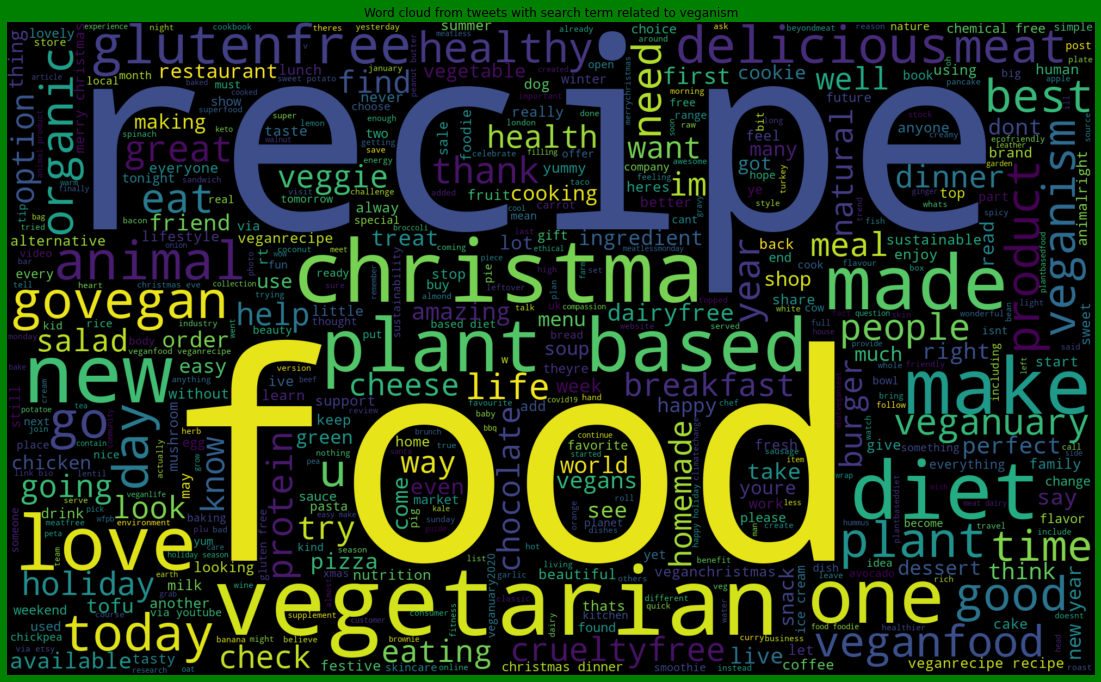

In [29]:
# plotting word cloud
allwords = ' '.join( [twts for twts in df['Text']])
restricted = ['vegan','plant based','plantbased', 'meatreduction','https'] + list(STOPWORDS)
plt.figure(figsize=(20,12), facecolor='green')
wordCloud = WordCloud(stopwords = restricted, max_words= 500, width = 2000, height = 1200, random_state = 21).generate(allwords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud from tweets with search term related to veganism')
plt.show

In [30]:
# converting the datetime into years
df['Datetime']=pd.to_datetime(df['Datetime'])
df['Year']=df['Datetime'].dt.year


df

,Datetime,Text,Location,word_count,Year
0,2022-07-19 23:58:23+00:00,soup proof wife says much black pepper good ve...,"Coordinates(longitude=-118.668404, latitude=33...",17,2022
1,2022-07-19 23:56:31+00:00,nursing moms appreciate soothe pain discomfort...,NaN,14,2022
2,2022-07-19 23:55:52+00:00,veganism accepted either religious spiritual m...,NaN,24,2022
3,2022-07-19 23:55:23+00:00,signature white musk scent generation freshen ...,NaN,31,2022
4,2022-07-19 23:53:32+00:00,powerful republican congressman california vot...,NaN,34,2022
...,...,...,...,...,...
58904,2019-01-01 23:39:59+00:00,new year new resolve practice daily climateact...,"Coordinates(longitude=-112.3239143, latitude=3...",18,2019
58905,2019-01-01 23:32:38+00:00,new year new resolve practice daily climateact...,"Coordinates(longitude=-112.3239143, latitude=3...",19,2019
58906,2019-01-01 10:53:33+00:00,12 new years wish plant meetings set sessions ...,NaN,39,2019
58907,2019-01-01 01:48:36+00:00,16 wfpb vegan carnivore keto lchf vegetarian p...,NaN,37,2019


In [31]:
word_list=df['Text'].tolist()

## Topic Modeling using Gensim and LDA

In [32]:
#importing necessary packages for topic modelling
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models  
import spacy
from spacy.lang.en.examples import sentences 

In [33]:
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [34]:
# Defining the function to convert sentences into token
np= spacy.load('en_core_web_md',disable=['parser','ner'])
def lemmatize(text, allowed_postags=['NOUN','ADJ']):
    result=[]
    for topics in text:
        doc= np(topics) 
        result.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return result

In [35]:
# Calling the function to convert the tweets into tokens
tokenized_tweet = lemmatize(word_list)
print(tokenized_tweet[0])

['soup', 'wife', 'much', 'black', 'pepper']


In [36]:
# Defining the document term matrix for modelling using vocabulary of words
dict = corpora.Dictionary(tokenized_tweet)
doc_term_mat = [dict.doc2bow(tweet) for tweet in tokenized_tweet]

In [37]:
# Using gensim library, creating object for LDA model
LDA = gensim.models.ldamodel.LdaModel

# Building LDA model for 10 topics
lda_model = LDA(corpus =doc_term_mat, id2word = dict, num_topics = 10, random_state =100,
               chunksize=1000, passes= 50, iterations = 100)

In [38]:
# Displaying the topics
lda_model.print_topics()

[(0,
  '0.144*"vegan" + 0.041*"recipe" + 0.026*"glutenfree" + 0.023*"holiday" + 0.016*"food" + 0.015*"chocolate" + 0.014*"dinner" + 0.012*"delicious" + 0.012*"cookie" + 0.011*"veganuary"'),
 (1,
  '0.084*"vegan" + 0.039*"food" + 0.033*"breakfast" + 0.031*"option" + 0.023*"healthy" + 0.022*"menu" + 0.022*"restaurant" + 0.020*"bean" + 0.020*"vegetarian" + 0.018*"snack"'),
 (2,
  '0.064*"happy" + 0.048*"vegan" + 0.031*"beauty" + 0.022*"company" + 0.020*"future" + 0.019*"love" + 0.018*"style" + 0.018*"work" + 0.015*"brand" + 0.015*"art"'),
 (3,
  '0.061*"vegan" + 0.013*"winter" + 0.011*"body" + 0.011*"news" + 0.010*"lifestyle" + 0.010*"sustainability" + 0.009*"consumer" + 0.008*"place" + 0.008*"peace" + 0.008*"part"'),
 (4,
  '0.066*"vegan" + 0.028*"new" + 0.025*"day" + 0.023*"available" + 0.021*"today" + 0.021*"free" + 0.020*"order" + 0.020*"time" + 0.019*"first" + 0.016*"cream"'),
 (5,
  '0.123*"vegan" + 0.052*"animal" + 0.040*"year" + 0.022*"veganism" + 0.022*"life" + 0.018*"people" + 0

In [48]:
# Visualizing the topics
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_mat, dict)
pyLDAvis.display(vis)

In [40]:
# Measuring how good the model is (lower value means model is good)
print("Perplexity: ",lda_model.log_perplexity(doc_term_mat, total_docs=60000))

# Coherence score calculation 
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model= lda_model, texts= tokenized_tweet, dictionary= dict, coherence = 'u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -8.885062112975278

Coherence Score:  -5.324120362902503


In [50]:
# Defining a function to find the model with highest coherence value
def coh_values(dict, corpus, text, limit, start =2, step=1):
    coh_values=[]
    mod_list= []
    for topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = topics, id2word= dict)
        mod_list.append(model)
        cohmodel = CoherenceModel(model=model, texts= text, dictionary = dict, coherence = 'u_mass')
        coh_values.append(cohmodel.get_coherence())
    return mod_list, coh_values

In [51]:
# Calling the function to get the model with highest coherence values
model_list, coh_values = coh_values( dict = dict, corpus = doc_term_mat, text= tokenized_tweet, limit= 50, start=2,  step=1)

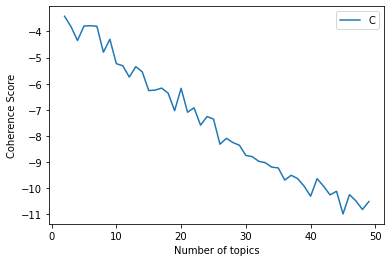

In [52]:
# Plotting a graph to find the highest coherence values for topics
limit = 50; start=2; step=1;
x=range(start, limit, step)
plt.plot(x, coh_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.legend(("Coherence Values"), loc='best')
plt.show()

In [53]:
# Printing the coherence scores for differenct topics
for n,cv in zip(x, coh_values):
    print("Number of Topics: ", n, " has Coherence value: ", round(cv,4))

Number of Topics:  2  has Coherence value:  -3.4161
Number of Topics:  3  has Coherence value:  -3.8172
Number of Topics:  4  has Coherence value:  -4.3458
Number of Topics:  5  has Coherence value:  -3.7938
Number of Topics:  6  has Coherence value:  -3.7778
Number of Topics:  7  has Coherence value:  -3.8021
Number of Topics:  8  has Coherence value:  -4.795
Number of Topics:  9  has Coherence value:  -4.2983
Number of Topics:  10  has Coherence value:  -5.233
Number of Topics:  11  has Coherence value:  -5.3143
Number of Topics:  12  has Coherence value:  -5.7463
Number of Topics:  13  has Coherence value:  -5.3496
Number of Topics:  14  has Coherence value:  -5.5454
Number of Topics:  15  has Coherence value:  -6.2651
Number of Topics:  16  has Coherence value:  -6.2458
Number of Topics:  17  has Coherence value:  -6.1695
Number of Topics:  18  has Coherence value:  -6.3665
Number of Topics:  19  has Coherence value:  -7.0333
Number of Topics:  20  has Coherence value:  -6.1778
Num

In [45]:
# Selecting the optimal model from the set of models tested for coherence value
opt_mod= model_list[2]
mod_topics= opt_mod.show_topics(formatted =False)
opt_mod.print_topics(num_words=10)

[(0,
  '0.045*"vegan" + 0.019*"protein" + 0.019*"plant" + 0.017*"diet" + 0.014*"natural" + 0.011*"gift" + 0.010*"organic" + 0.009*"free" + 0.007*"health" + 0.006*"body"'),
 (1,
  '0.094*"vegan" + 0.031*"recipe" + 0.013*"glutenfree" + 0.010*"chocolate" + 0.009*"dinner" + 0.009*"cookie" + 0.008*"breakfast" + 0.008*"delicious" + 0.007*"holiday" + 0.007*"healthy"'),
 (2,
  '0.063*"vegan" + 0.026*"meat" + 0.025*"plant" + 0.021*"animal" + 0.018*"plantbased" + 0.014*"food" + 0.012*"burger" + 0.011*"happy" + 0.008*"milk" + 0.008*"dairy"'),
 (3,
  '0.073*"vegan" + 0.031*"food" + 0.021*"plant" + 0.017*"healthy" + 0.016*"plantbased" + 0.015*"new" + 0.014*"diet" + 0.009*"health" + 0.009*"today" + 0.009*"year"')]